In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


date : Thu Sep  5 02:29:22 PDT 2019
hostname : baldr
whoami : tmb
pwd : /home/tmb/exp/icdar2019-img



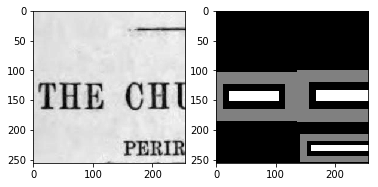

In [2]:
exec(open("startup.py").read())
images, targets, = next(iter(training_dl))
subplot(121); imshow(images[0,:,:,0]); subplot(122); imshow(targets[0])

In [3]:
import models; reload(models)
model = models.make("seg_unet")
epoch, loss = models.load_latest(model)
model

loading models/seg_unet-017-000432037.pth


Sequential(
  (0): Input(BHWD->BDHW torch.float32 (0, 1) cuda:0 [None, 1, None, None])
  (1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): UnetLayer(
    (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (up): ConvTranspose2d(256, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (sub): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_runn

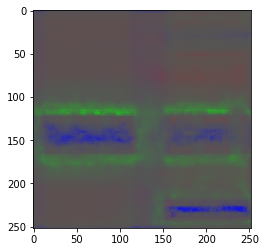

In [4]:
reload(helpers)
trainer = helpers.SegTrainer(model)
result = trainer.probs_batch(images).detach().softmax(1).cpu().numpy()[0].transpose(1, 2, 0)
result -= amin(result)
result /= amax(result)
imshow(result)

In [5]:
!mkdir -p models

In [6]:
figsize(15, 5)

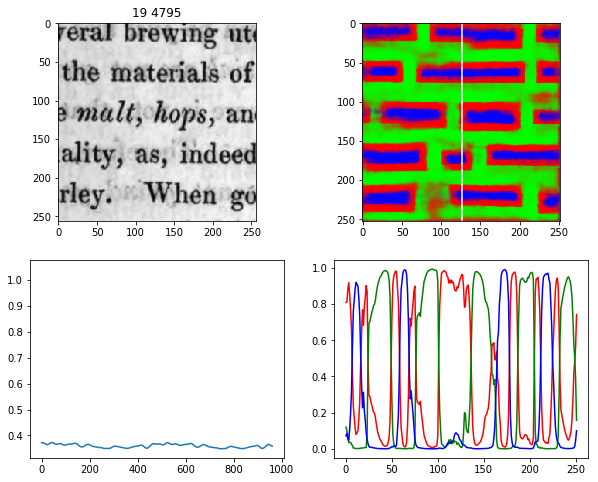

In [7]:
reload(helpers)
trainer = helpers.SegTrainer(model, lr=[1e-3]+[1e-4])
trainer.train(training_dl, 20, start_epoch=epoch+1)
IPython.display.clear_output(wait=True)